# Calories Burned Prediction
## Table of Contents
- Introduction
- Importing The Libraries
- Reading The Data
- Data Inspection
- Exploratory Data Analysis (EDA)
- Feature Transformations
- Building Model
- Evaluating Model Performance
- Model Deployment
- Conclusion

# Introduction

> In this project, i will predict the calories burnt by using two datasets, one of the datasets contains the target feature and the other one contains the needed features for predicting the burnt calories.

# Importing The Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":[7,7]},font_scale=1.1)

# Reading The Data

In [2]:
calories_data=pd.read_csv("Data/calories.csv")
exercise_data=pd.read_csv("Data/exercise.csv")

In [3]:
#Displaying the first five rows
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
#Displaying the first five rows
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
#Data combining
df=pd.concat([exercise_data,calories_data["Calories"]],axis=1)

In [6]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Data Inspection

In [7]:
#Shape of the data
df.shape

(15000, 9)

- No.of records = 15000
- No.of features = 9

In [8]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


- No missing values
- No.of categorical features = 1
- No.of numerical features = 8

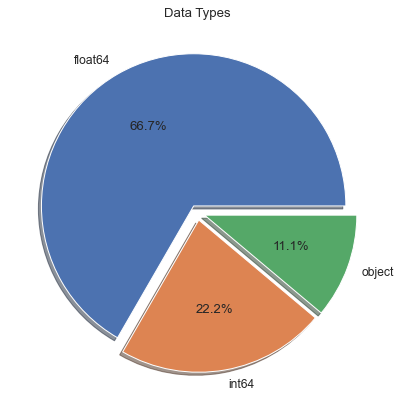

In [9]:
df.dtypes.value_counts().plot.pie(shadow=True,explode=[0.05,0.05,0.05],autopct='%1.1f%%')
plt.ylabel("")
plt.title("Data Types")
plt.show()

- Most of the data are float as it equals to 66.7% of the data.

In [10]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

- Data are clean

In [11]:
#Data description
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Exploratory Data Analysis (EDA)

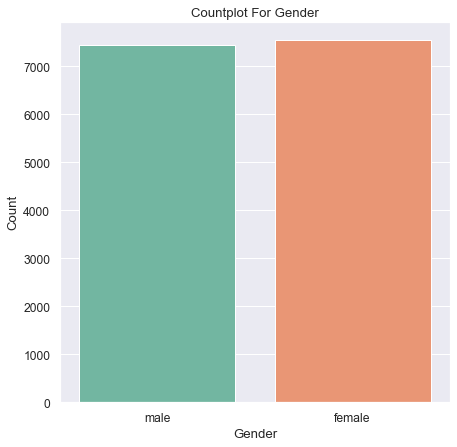

In [12]:
sns.countplot(df["Gender"],palette="Set2")
plt.ylabel("Count")
plt.title("Countplot For Gender")
plt.show()

- From countplot, number of females is greater than number of males but they aren't have a big gap in number.

In [13]:
def dstplt(data,col,bins=None):
    '''
    This function plots the distribution of the data.
    INPUT:
    data: str. The name of the dataset.
    col: str. The name of the feature.
    bins: int. Number of bins into the shape.
    OUTPUT:
    Distplot shows the distribution of the entered data.
    '''
    sns.distplot(data[col],bins=bins)
    plt.title(col.title()+" Distribution")
    plt.show()

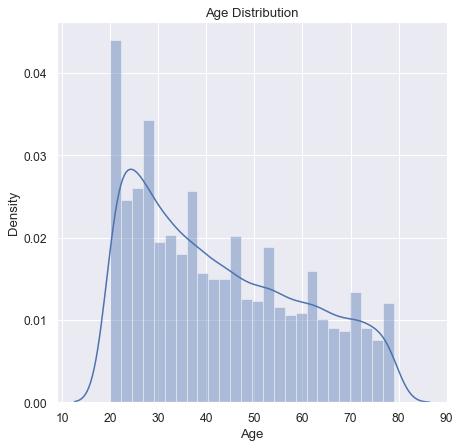

In [14]:
dstplt(df,"Age")

- Age distribution is right skewed.
- Most people age at 20 years old.
- Ages range from 20 to 79 years old.

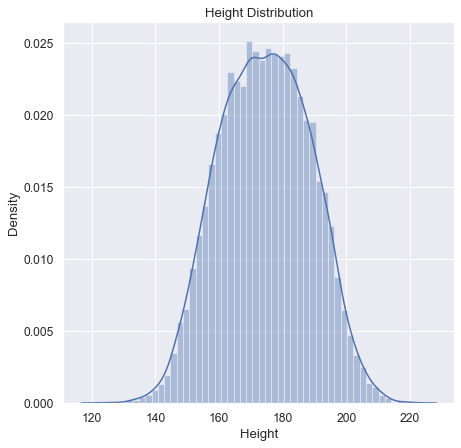

In [15]:
dstplt(df,"Height")

- Height distribution is normal distribution.
- Heights range from 123 to 222 cm.

In [16]:
df["Height"].value_counts().reset_index().rename(columns={"index":"Height","Height":"Count"}).head()

,Height,Count
0,179.0,394
1,169.0,388
2,176.0,383
3,171.0,374
4,177.0,371


- Most heights are 179 cm.

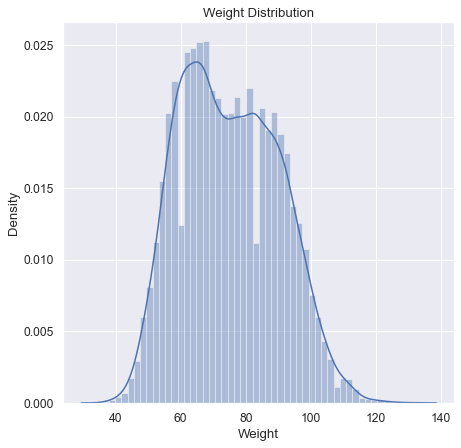

In [17]:
dstplt(df,"Weight")

- Weight distribution almost looks like normal distribution.
- Weights range from 36 to 132 kg.
- Most weights are 66 kg.

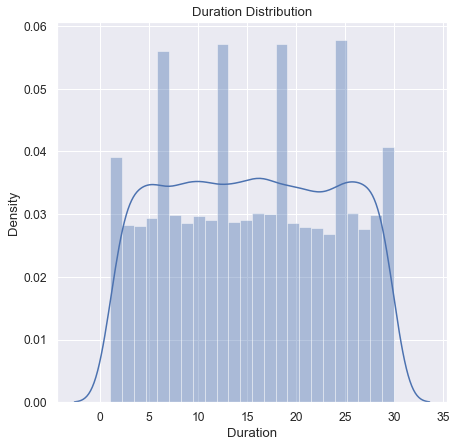

In [18]:
dstplt(df,"Duration")

- Most people do exercises in 26 minutes.

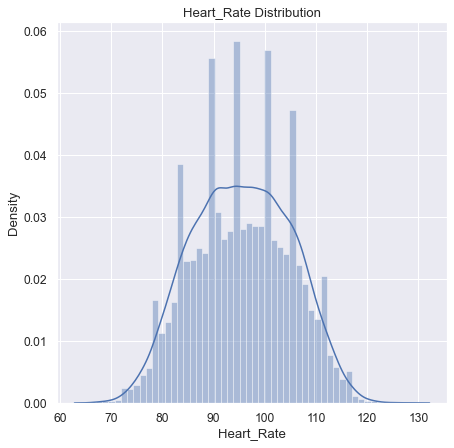

In [19]:
dstplt(df,"Heart_Rate")

- Heart rate distribution is normal distribution.
- Heart rate range from 67 to 128 heart beats.

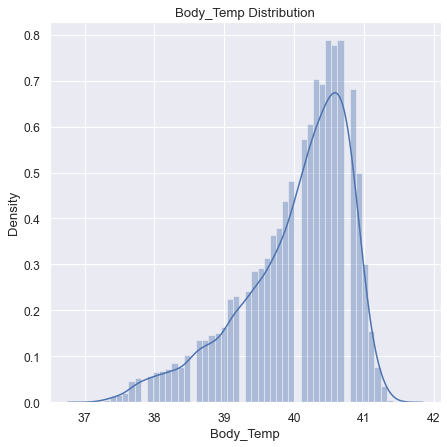

In [20]:
dstplt(df,"Body_Temp")

- Body temperature distribution is left skewed.

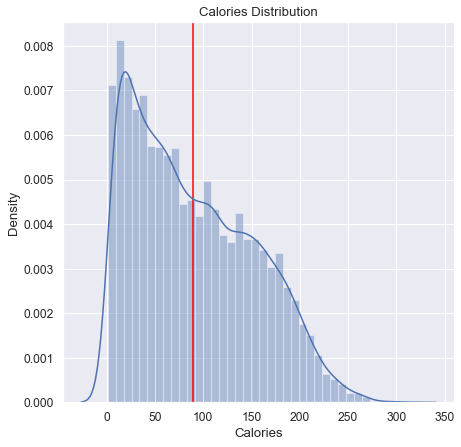

In [21]:
plt.axvline(df["Calories"].mean(),color="red")
dstplt(df,"Calories")

- Calories distribution is right skewed.
- The average of burned calories almost equal to 90 calories.

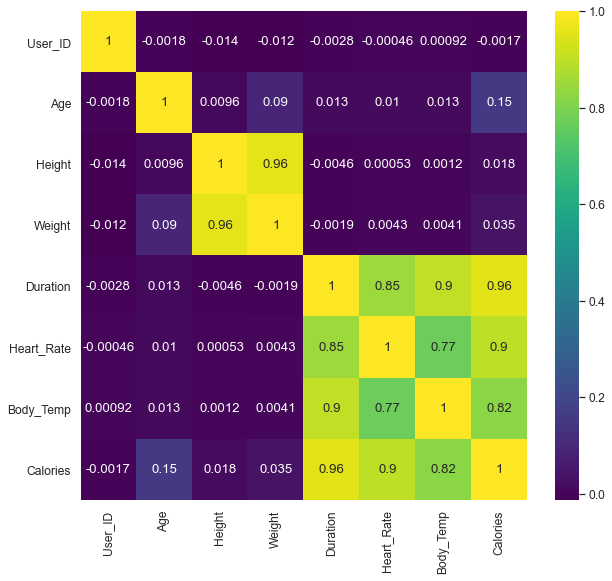

In [22]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),cmap="viridis",annot=True)
plt.show()

- From heatmap, there is a correlation between a lot of features.

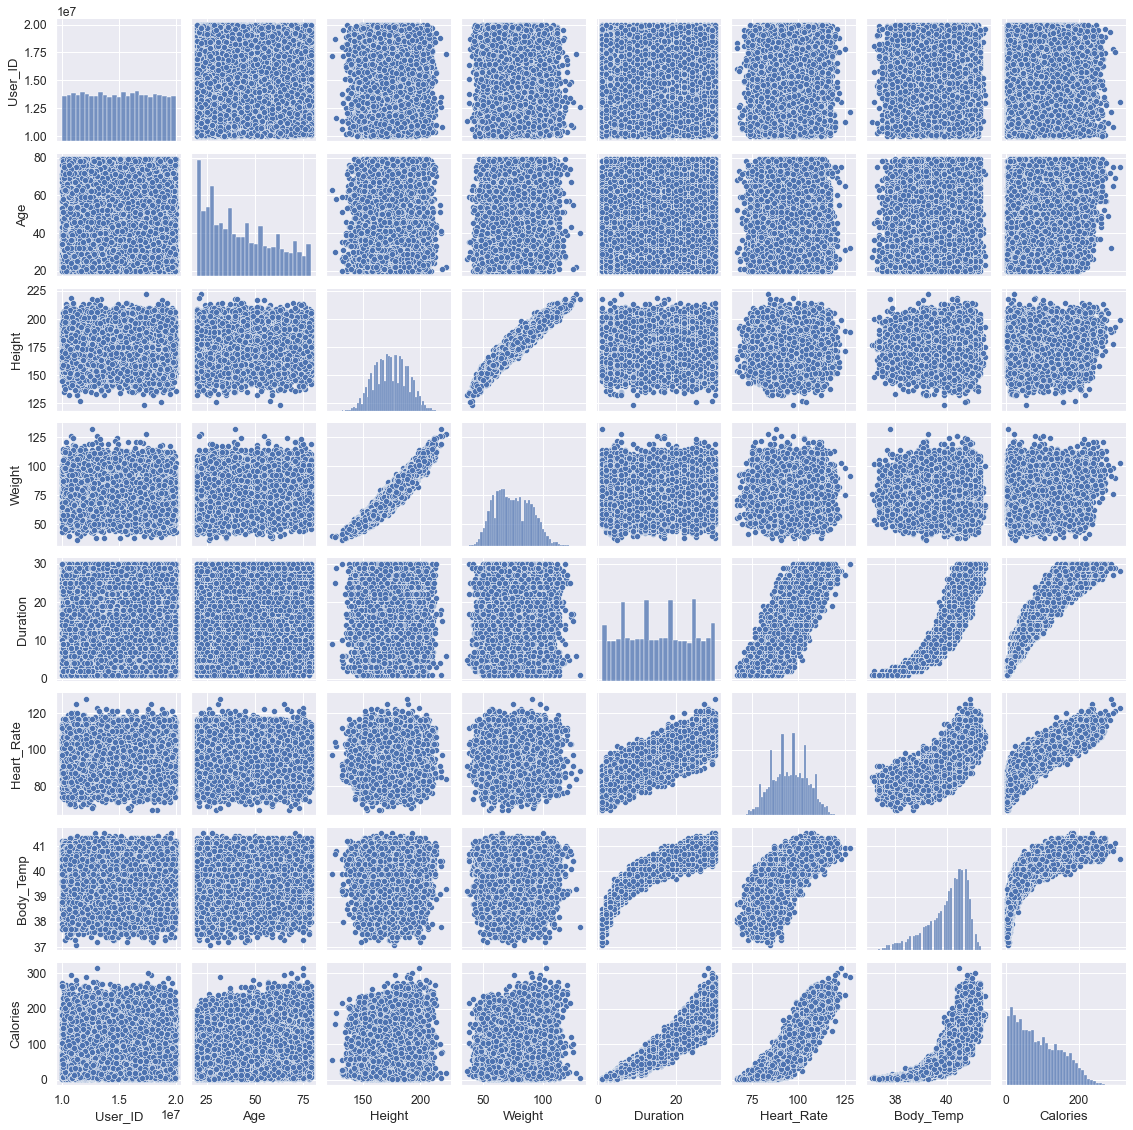

In [23]:
sns.pairplot(df,size=2);

- By using the pairplot:
    - There is a strong positive correlation between the height and the weight.
    - There is a strong positive correlation between the duration and the temperature of the body, also between duration and heart rate there is a strong positive correlation.
    - There is a strong positive correlation between the heart rate and the temperature of the body.
    - Most of the data have a strong positive correlation between each other.
    - There are strong positive correlation between some features and calories.

In [24]:
def sctrplt(data,x,y,title):
    '''
    This function plots the correlation between two features of the data.
    INPUT:
    data: str. The name of the dataset.
    x: str. Feature name in the dataset.
    y: str. Feature name in the dataset.
    title: str. Scatterplot title.
    OUTPUT:
    Scatterplot shows the correlation between two features of the data.
    '''
    sns.scatterplot(data=data,x=x,y=y)
    plt.title(title.title())
    plt.show()

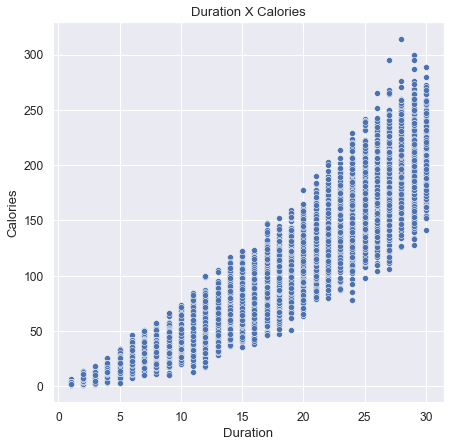

In [25]:
sctrplt(df,"Duration","Calories","duration x calories")

- From the above figure, there is a strong positive correlation between the exercise duration and burned calories.

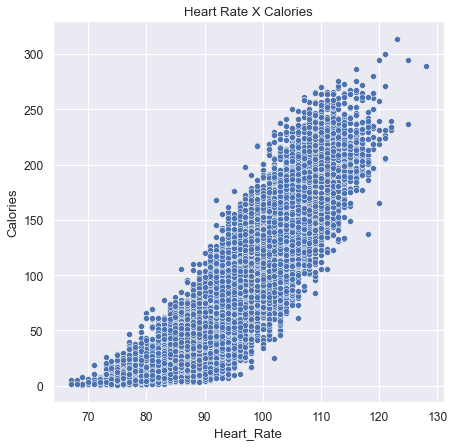

In [26]:
sctrplt(df,"Heart_Rate","Calories","heart rate x calories")

- From the above figure, there is a strong positive correlation between the heart rate and burned calories.

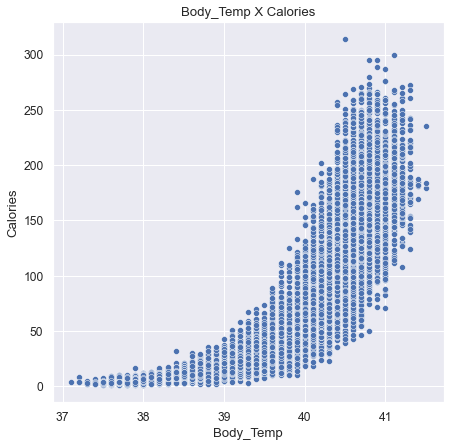

In [27]:
sctrplt(df,"Body_Temp","Calories","body_temp x calories")

- From the above figure, there is a strong positive correlation between the temperature of the body and burned calories.

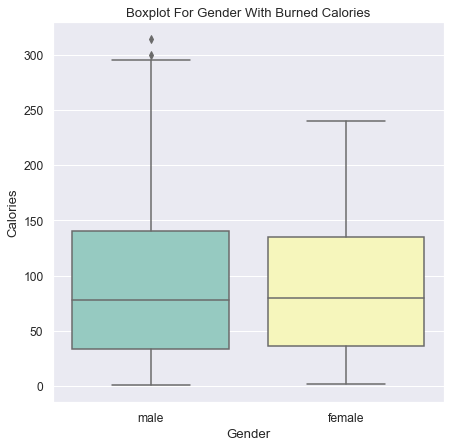

In [28]:
sns.boxplot(data=df,x="Gender",y="Calories",palette="Set3")
plt.title("Boxplot For Gender With Burned Calories")
plt.show()

- Range of burned calories in males is greater than females, this is normal because the physical strength of men is greater than that of women.

# Feature Transformations

In [29]:
#Splitting the data to x and y
x=df.drop(['User_ID','Calories'],axis=1)
y=df["Calories"]

In [30]:
#Getting the dummies
x=pd.get_dummies(x,columns=["Gender"],drop_first=True)

In [31]:
x.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,1
1,20,166.0,60.0,14.0,94.0,40.3,0
2,69,179.0,79.0,5.0,88.0,38.7,1
3,34,179.0,71.0,13.0,100.0,40.5,0
4,27,154.0,58.0,10.0,81.0,39.8,0


- All the features into the dataframe x are numeric.

In [32]:
#Saving the columns into features
features=x.columns

In [33]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [34]:
#Applying standard scaling
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

# Building Model

In [35]:
#XGBoost Regressor
xgbr=XGBRegressor()

In [36]:
#Applying cross validation
cross_val=cross_validate(xgbr,x,y,n_jobs=-1,cv=10,return_train_score=True)

In [37]:
cross_val

{'fit_time': array([3.15210414, 3.18334675, 3.57555985, 3.19897819, 3.55952811,
        3.18335629, 3.57555985, 3.21459889, 1.06633353, 1.00384784]),
 'score_time': array([0.03125238, 0.01563048, 0.01563001, 0.03124237, 0.01401615,
        0.03124261, 0.01563001, 0.01562166, 0.        , 0.01551342]),
 'test_score': array([0.99889265, 0.99883539, 0.99885885, 0.99890766, 0.99897094,
        0.99900089, 0.99869048, 0.99901935, 0.99898171, 0.99896535]),
 'train_score': array([0.99952246, 0.99953453, 0.99955468, 0.99957452, 0.99954866,
        0.99955817, 0.99955384, 0.99954856, 0.99955974, 0.99959505])}

# Evaluating Model Performance

In [38]:
print("Training Score: ",cross_val["train_score"].mean())
print("Testing Score: ",cross_val["test_score"].mean())

Training Score:  0.9995550209336749
Testing Score:  0.9989123269840265


In [39]:
#Obtaining the predicted values
y_pred=cross_val_predict(xgbr,x,y,n_jobs=-1,cv=10)
y_pred

array([227.78166 ,  66.0601  ,  26.640814, ...,  72.85223 ,  10.03006 ,
       103.3966  ], dtype=float32)

In [40]:
#Mean absolute error
mean_absolute_error(y,y_pred)

1.4240011504073937

In [41]:
#Mean squared error
mean_squared_error(y,y_pred)

4.239845494069421

In [42]:
#R2 score
r2_score(y,y_pred)

0.998913031267968

# Model Deployment

In [43]:
#Fitting x and y
xgbr.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
#Saving the models
joblib.dump(xgbr,'model.h5')
joblib.dump(scaler,'scaler.h5')
joblib.dump(features,'features.h5')

['features.h5']

# Conclusion

> - Most of the data is numeric as numeric data represents 88.9% of the data.
> - The average of burned calories in this data almost equal to 90 calories.
> - EDA gives a report that there are strong positive correlation between some features and calories(Target feature).
> - I dropped the User_ID feature as it is a useless feature.
> - Getting the dummies very important for taking a real benefits from categorical data during machine learning model as i did with gender feature.
> - Standard scaler helps to get standardized distribution, and gives us good results.
> - From EDA, regression models will give a high accuracy, but the reasons to use XGBoost are execution speed and model performance.
> - Mean absolute error(MAE) eaual to 1.42.
> - Mean squared error(MSE) equal to 4.23.
> - By using r2_score metric, accuracy almost equal to 100%.